## CS285 Fall 2019 Tensorflow Tutorial

This tutorial will provide a brief overview of the core concept and functionality of Tensorflow.

In [1]:
import os
import warnings
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
warnings.filterwarnings('ignore')

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches

In [4]:
def tf_reset():
    try:
        sess.close()
    except:
        pass
    tf.reset_default_graph()
    return tf.Session()

## 0. What is Tensorflow

In [5]:
# create the session you'll work in
# you can think of this as a "blank piece of paper" that you'll be writing math on
sess = tf_reset()

# define your ipnuts
a = tf.constant(1.0)
b = tf.constant(2.0)

# do some operations
c = a + b

# get the result
c_run = sess.run(c)
print('c={0}'.format(c_run))

c=3.0


## 1. How to input data

In [6]:
sess = tf_reset()

# define your inputs
a = tf.placeholder(dtype=tf.float32, shape=[1], name='a_placeholder')
b = tf.placeholder(dtype=tf.float32, shape=[1], name='b_placeholder')

# do some operations
c = a + b

# get the result
c0_run = sess.run(c, feed_dict={a:[1.0], b:[2.0]})
c1_run = sess.run(c, feed_dict={a:[5.0], b:[2.0]})

print('c0={0}'.format(c0_run))
print('c1={0}'.format(c1_run))

c0=[3.]
c1=[7.]


what if we don't know the size of our input beforehand? One dimension of a tensor is allowed to be 'None', which means it can be variable sized

In [8]:
sess = tf_reset()

# define your inputs
a = tf.placeholder(dtype=tf.float32, shape=[None], name='a_placeholder')
b = tf.placeholder(dtype=tf.float32, shape=[None], name='b_placeholder')

# do some operations
c = a + b

# get outputs
c0_run = sess.run(c, feed_dict={a:[1.0], b:[2.0]})
c1_run = sess.run(c, feed_dict={a:[5.0, 10.0], b:[2.0, 4.0]})

print(a)
print(b)
print('a shape:{0}'.format(a.get_shape()))
print('b shape:{0}'.format(b.get_shape()))
print('c0={0}'.format(c0_run))
print('c1={0}'.format(c1_run))

Tensor("a_placeholder:0", shape=(?,), dtype=float32)
Tensor("b_placeholder:0", shape=(?,), dtype=float32)
a shape:(?,)
b shape:(?,)
c0=[3.]
c1=[ 7. 14.]


## 2. How to perform computations

In [9]:
sess = tf_reset()

# inputs
a = tf.constant([[-1.],[-2.],[-3.]], dtype=tf.float32)
b = tf.constant([[-1.,-2., -3.]], dtype=tf.float32)

a_run, b_run = sess.run([a, b])
print('a:\n{0}'.format(a_run))
print('b:\n{0}'.format(b_run))

a:
[[-1.]
 [-2.]
 [-3.]]
b:
[[-1. -2. -3.]]


In [10]:
c = b + b

c_run = sess.run(c)
print('b:\n{0}'.format(b_run))
print('c:\n{0}'.format(c_run))

b:
[[-1. -2. -3.]]
c:
[[-2. -4. -6.]]


be careful about the dimensions of the tensors, some operations may work even when you think they shouldn't ...

In [11]:
c = a + b
c_run = sess.run(c)
print('a:\n{0}'.format(a_run))
print('b:\n{0}'.format(b_run))
print('c:\n{0}'.format(c_run))

a:
[[-1.]
 [-2.]
 [-3.]]
b:
[[-1. -2. -3.]]
c:
[[-2. -3. -4.]
 [-3. -4. -5.]
 [-4. -5. -6.]]


also some operations may be different than you expect:

In [12]:
c_elementwise = a * b
c_matmul = tf.matmul(b, a)

c_elementwise_run, c_matmul_run = sess.run([c_elementwise, c_matmul])
print('a:\n{0}'.format(a_run))
print('b:\n{0}'.format(b_run))
print('c_elementwise:\n{0}'.format(c_elementwise_run))
print('c_matmul:\n{0}'.format(c_matmul_run))

a:
[[-1.]
 [-2.]
 [-3.]]
b:
[[-1. -2. -3.]]
c_elementwise:
[[1. 2. 3.]
 [2. 4. 6.]
 [3. 6. 9.]]
c_matmul:
[[14.]]


operation can be chained together

In [13]:
c0 = b + b
c1 = c0 + 1

c0_run , c1_run = sess.run([c0, c1])
print('b:\n{0}'.format(b_run))
print('c0:\n{0}'.format(c0_run))
print('c1:\n{0}'.format(c1_run))

b:
[[-1. -2. -3.]]
c0:
[[-2. -4. -6.]]
c1:
[[-1. -3. -5.]]


Finally, tensorflow has many useful built-in operations

In [14]:
c = tf.reduce_mean(b)

c_run = sess.run(c)
print('b:\n{0}'.format(b_run))
print('c:\n{0}'.format(c_run))

b:
[[-1. -2. -3.]]
c:
-2.0


## 3. How to create variables

In [15]:
sess = tf_reset()

var_init_value = [[2.0, 4.0, 6.0]]
var = tf.get_variable(name='myvar',
                     shape=[1, 3],
                     dtype=tf.float32,
                     initializer=tf.constant_initializer(var_init_value))

print(var)

<tf.Variable 'myvar:0' shape=(1, 3) dtype=float32_ref>


and check that it's been added to Tensorflow's variables list

In [16]:
print(tf.global_variables())

[<tf.Variable 'myvar:0' shape=(1, 3) dtype=float32_ref>]


we can do operations with the variable just like any other tensor

In [17]:
b = tf.constant([[1.,2.,3.]], dtype=tf.float32)
c = b + var
print(b)
print(var)
print(c)

Tensor("Const:0", shape=(1, 3), dtype=float32)
<tf.Variable 'myvar:0' shape=(1, 3) dtype=float32_ref>
Tensor("add:0", shape=(1, 3), dtype=float32)


before we can run any of these operations, we must first initalize the variables

In [19]:
init_op = tf.global_variables_initializer()
sess.run(init_op)

and then we can run the operations just as we normally would.

In [22]:
c_run = sess.run(c)
print('b:\n{0}'.format(b_run))
print('var:\n{0}'.format(var_init_value))
print('c:\n{0}'.format(c_run))

b:
[[-1. -2. -3.]]
var:
[[2.0, 4.0, 6.0]]
c:
[[3. 6. 9.]]


## 4. How to train a neural network for a simple regression problem

First, we'll create data for a 1-dimensional regression problem:

(10000, 1)
(10000, 1)


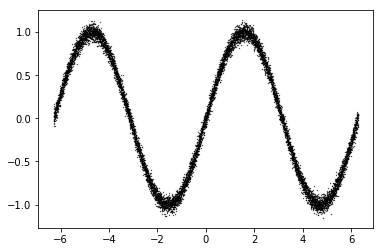

In [29]:
# generate the data
inputs = np.linspace(-2*np.pi, 2*np.pi, 10000)[:, None]
outputs = np.sin(inputs) + 0.05 * np.random.normal(size=[len(inputs), 1])
print(np.shape(inputs))
print(np.shape(outputs))
plt.scatter(inputs[:,0], outputs[:,0], s=0.1, color='k', marker='o')

The below code creates the inputs, variables, neural network operations, mean-squared-error loss, gradient descent optimizer, and runs the optimizer using minibatches of the data

In [32]:
sess = tf_reset()

def create_model():
    # create inputs
    input_ph = tf.placeholder(dtype=tf.float32, shape=[None, 1])
    output_ph = tf.placeholder(dtype=tf.float32, shape=[None, 1])
    
    #create variables
    W0 = tf.get_variable(name='W0', shape=[1, 20], initializer = tf.contrib.layers.xavier_initializer())
    W1 = tf.get_variable(name='W1', shape=[20, 20], initializer = tf.contrib.layers.xavier_initializer())
    W2 = tf.get_variable(name='W2', shape=[20, 1], initializer = tf.contrib.layers.xavier_initializer())
    
    b0 = tf.get_variable(name='b0', shape=[20], initializer = tf.contrib.layers.xavier_initializer())
    b1 = tf.get_variable(name='b1', shape=[20], initializer = tf.contrib.layers.xavier_initializer())
    b2 = tf.get_variable(name='b2', shape=[1], initializer = tf.contrib.layers.xavier_initializer())
    
    weights = [W0, W1, W2]
    biases = [b0, b1, b2]
    activations = [tf.nn.relu, tf.nn.relu, None]
    
    # create computation graph
    layer = input_ph
    for W, b, activation in zip(weights, biases, activations):
        layer = tf.matmul(layer, W) + b
        if activation is not None:
            layer = activation(layer)
    output_pred = layer
    
    return input_ph, output_ph, output_pred

input_ph, output_ph, output_pred = create_model()

# create loss
mse = tf.reduce_mean(0.5 * tf.square(output_pred - output_ph))

# create optimizer
opt = tf.train.AdamOptimizer().minimize(mse)

# initializer variables
sess.run(tf.global_variables_initializer())
# create saver to save model variables
saver = tf.train.Saver()

# run training
batch_size = 32
for training_step in range(10000):
    # get a random subset of the training data
    indices = np.random.randint(low=0, high=len(inputs), size=batch_size)
    input_batch = inputs[indices]
    output_batch = outputs[indices]
    
    # run the optimizer and get the mse
    _, mse_run = sess.run([opt, mse], feed_dict={input_ph:input_batch, output_ph:output_batch})
    
    # print the mse every so ofthen
    if training_step % 1000 == 0:
        print('{0:04d} mse:{1:.3f}'.format(training_step, mse_run))
        saver.save(sess, '/tmp/model.cpkt')

0000 mse:0.613
1000 mse:0.016
2000 mse:0.003
3000 mse:0.002
4000 mse:0.001
5000 mse:0.002
6000 mse:0.003
7000 mse:0.001
8000 mse:0.001
9000 mse:0.001


Now that the neural network is trained, we can use it to make predictions

INFO:tensorflow:Restoring parameters from /tmp/model.cpkt


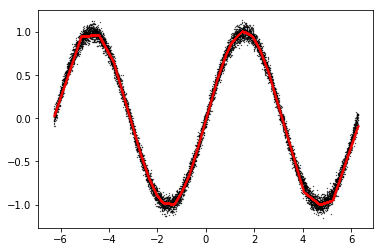

In [35]:
sess = tf_reset()

# create the model
input_ph, output_ph, output_pred = create_model()

# restore the saved model
saver = tf.train.Saver()
saver.restore(sess, '/tmp/model.cpkt')

output_pred_run = sess.run(output_pred, feed_dict={input_ph: inputs})
plt.scatter(inputs[:,0], outputs[:,0], c='k', marker='o', s=0.1)
plt.scatter(inputs[:,0], output_pred_run[:,0],c='r',marker='o', s=0.1)

## 5. Tips and tricks

*(a)Check your dimensions*

In [36]:
a = tf.constant(np.random.random((4,1)))
b = tf.constant(np.random.random((1,4)))
c = a * b
assert c.get_shape() == (4,4)

*(b) check what variables have been created*

In [37]:
sess = tf_reset()
a = tf.get_variable('I_am_a_variable',shape=[4,6])
n = tf.get_variable('I_am_a_variable_too',shape=[2,7])
for var in tf.global_variables():
    print(var.name)

I_am_a_variable:0
I_am_a_variable_too:0


*(c)Look at the Tensorflow api*

In [38]:
help(tf.reduce_mean)

Help on function reduce_mean in module tensorflow.python.ops.math_ops:

reduce_mean(input_tensor, axis=None, keepdims=None, name=None, reduction_indices=None, keep_dims=None)
    Computes the mean of elements across dimensions of a tensor. (deprecated arguments)
    
    SOME ARGUMENTS ARE DEPRECATED. They will be removed in a future version.
    Instructions for updating:
    keep_dims is deprecated, use keepdims instead
    
    Reduces `input_tensor` along the dimensions given in `axis`.
    Unless `keepdims` is true, the rank of the tensor is reduced by 1 for each
    entry in `axis`. If `keepdims` is true, the reduced dimensions
    are retained with length 1.
    
    If `axis` is None, all dimensions are reduced, and a
    tensor with a single element is returned.
    
    For example:
    
    ```python
    x = tf.constant([[1., 1.], [2., 2.]])
    tf.reduce_mean(x)  # 1.5
    tf.reduce_mean(x, 0)  # [1.5, 1.5]
    tf.reduce_mean(x, 1)  # [1.,  2.]
    ```
    
    Args:
      

*(e)use variable scope to keep your variables organized*

In [39]:
sess = tf_reset()

# create variables
with tf.variable_scope('layer_0'):
    W0 = tf.get_variable(name='W0', shape=[1, 20], initializer = tf.contrib.layers.xavier_initializer())
    b0 = tf.get_variable(name='b0', shape=[20], initializer = tf.constant_initializer(0))

with tf.variable_scope('layer_1'):
    W1 = tf.get_variable(name='W1', shape=[20, 20], initializer = tf.contrib.layers.xavier_initializer())
    b1 = tf.get_variable(name='b1', shape=[20], initializer = tf.constant_initializer(0))

with tf.variable_scope('layer_2'):
    W2 = tf.get_variable(name='W2', shape=[20, 1], initializer = tf.contrib.layers.xavier_initializer())
    b2 = tf.get_variable(name='b2', shape=[1], initializer = tf.constant_initializer(0))
    
# print the variables
var_names = sorted([v.name for v in tf.global_variables()])
print('\n'.join(var_names))

layer_0/W0:0
layer_0/b0:0
layer_1/W1:0
layer_1/b1:0
layer_2/W2:0
layer_2/b2:0


*(f) You can specify which GPU you want to use and how much memory you want to use*

In [40]:
gpu_device = 0
gpu_frac = 0.5

# make only one of the GPUS visiable
import os
os.environ["CUDA_VISABLE_DEVICES"]=str(gpu_device)

# only use part of the GPU memory
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=gpu_frac)
config = tf.ConfigProto(gpu_options=gpu_options)

# create the session
tf_sess = tf.Session(graph=tf.Graph(), config=config)